In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL

import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
!unzip /content/drive/MyDrive/DL_CNN.zip

Streaming output truncated to the last 5000 lines.
  inflating: DL_CNN/Cat/11575.jpg    
  inflating: DL_CNN/Cat/11577.jpg    
  inflating: DL_CNN/Cat/11589.jpg    
  inflating: DL_CNN/Cat/11598.jpg    
  inflating: DL_CNN/Cat/1161.jpg     
  inflating: DL_CNN/Cat/11612.jpg    
  inflating: DL_CNN/Cat/11636.jpg    
  inflating: DL_CNN/Cat/11657.jpg    
  inflating: DL_CNN/Cat/11661.jpg    
  inflating: DL_CNN/Cat/11674.jpg    
  inflating: DL_CNN/Cat/11682.jpg    
  inflating: DL_CNN/Cat/11704.jpg    
  inflating: DL_CNN/Cat/11706.jpg    
  inflating: DL_CNN/Cat/11718.jpg    
  inflating: DL_CNN/Cat/11730.jpg    
  inflating: DL_CNN/Cat/11731.jpg    
  inflating: DL_CNN/Cat/1175.jpg     
  inflating: DL_CNN/Cat/11753.jpg    
  inflating: DL_CNN/Cat/1178.jpg     
  inflating: DL_CNN/Cat/1180.jpg     
  inflating: DL_CNN/Cat/11800.jpg    
  inflating: DL_CNN/Cat/11805.jpg    
  inflating: DL_CNN/Cat/11809.jpg    
  inflating: DL_CNN/Cat/11829.jpg    
  inflating: DL_CNN/Cat/11834.jpg    

In [3]:
data_dir = ("/content/DL_CNN")
print(data_dir)

/content/DL_CNN


In [4]:
data_dir = pathlib.Path("/content/DL_CNN")
print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

/content/DL_CNN


[PosixPath('/content/DL_CNN/Cat/5479.jpg'),
 PosixPath('/content/DL_CNN/Cat/2970.jpg'),
 PosixPath('/content/DL_CNN/Cat/2339.jpg'),
 PosixPath('/content/DL_CNN/Cat/7381.jpg'),
 PosixPath('/content/DL_CNN/Cat/7352.jpg')]

In [5]:
dogs = list(data_dir.glob('Dog/*'))
dogs[:5]

[PosixPath('/content/DL_CNN/Dog/2339.jpg'),
 PosixPath('/content/DL_CNN/Dog/8729.jpg'),
 PosixPath('/content/DL_CNN/Dog/2636.jpg'),
 PosixPath('/content/DL_CNN/Dog/5795.jpg'),
 PosixPath('/content/DL_CNN/Dog/1462.jpg')]

In [6]:
cats = list(data_dir.glob('Cat/*'))
cats[:5]

[PosixPath('/content/DL_CNN/Cat/5479.jpg'),
 PosixPath('/content/DL_CNN/Cat/2970.jpg'),
 PosixPath('/content/DL_CNN/Cat/2339.jpg'),
 PosixPath('/content/DL_CNN/Cat/7381.jpg'),
 PosixPath('/content/DL_CNN/Cat/7352.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

13638


In [8]:
X, Y = [], []

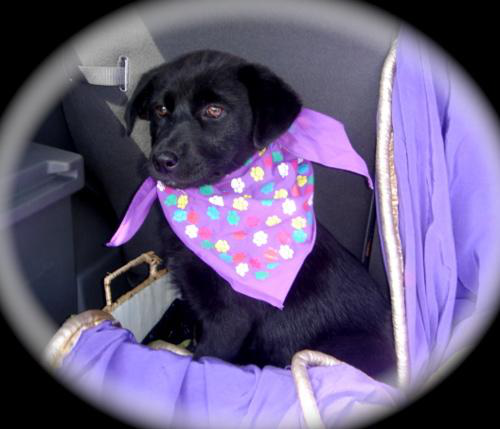

In [9]:
PIL.Image.open(str(dogs[1]))

In [10]:
pet_images_dict = {
    'cats': list(data_dir.glob('Cat/*')),
    'dogs': list(data_dir.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [11]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            #print("Invalid Image")
            continue

cats
dogs


In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape) 
print(Y_test.shape)

9855 9855
3286 3286
(9855, 150, 150, 3)
(9855,)
(3286, 150, 150, 3)
(3286,)


In [14]:
len(Y_test)

3286

In [15]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 4)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [17]:
mkdir CNN-Model

In [18]:
backup_dir = "/content/CNN-Model"

In [19]:
import tensorflow as tf
call_backs = [tf.keras.callbacks.TensorBoard(log_dir='./reduced7'),
              tf.keras.callbacks.BackupAndRestore(backup_dir),
              tf.keras.callbacks.ModelCheckpoint("/content/CNN-Model",monitor="val_loss",save_best_only=True,save_weights_only=True,mode="auto",save_freq="epoch",
    
)]

In [20]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=30,validation_data=(X_test, Y_test),callbacks = call_backs)

Epoch 1/30
308/308 [==============================] - 17s 13ms/step - loss: 2.5744 - accuracy: 0.8529 - val_loss: 0.3878 - val_accuracy: 0.8990
Epoch 2/30
308/308 [==============================] - 3s 11ms/step - loss: 0.3207 - accuracy: 0.9070 - val_loss: 0.3219 - val_accuracy: 0.9151
Epoch 3/30
308/308 [==============================] - 3s 10ms/step - loss: 0.2812 - accuracy: 0.9144 - val_loss: 0.3143 - val_accuracy: 0.9142
Epoch 4/30
308/308 [==============================] - 4s 11ms/step - loss: 0.2636 - accuracy: 0.9177 - val_loss: 0.3184 - val_accuracy: 0.9111
Epoch 5/30
308/308 [==============================] - 3s 11ms/step - loss: 0.2472 - accuracy: 0.9223 - val_loss: 0.3241 - val_accuracy: 0.9108
Epoch 6/30
308/308 [==============================] - 4s 11ms/step - loss: 0.2331 - accuracy: 0.9267 - val_loss: 0.3436 - val_accuracy: 0.9072
Epoch 7/30
308/308 [==============================] - 3s 10ms/step - loss: 0.2220 - accuracy: 0.9292 - val_loss: 0.3404 - val_accuracy: 0.906

In [21]:
model.save('cnn_catvsdog.h5')

In [22]:
test_loss, test_acc = model.evaluate(X_test,  Y_test)

103/103 [==============================] - 1s 6ms/step - loss: 0.9609 - accuracy: 0.8573


In [23]:
test_acc*100

85.7273280620575

In [24]:
x = model.predict(X_test)

In [25]:
x

array([[3.6648829e-02],
       [9.9748367e-01],
       [1.9901474e-04],
       ...,
       [9.3422439e-03],
       [5.9035528e-03],
       [2.6160320e-03]], dtype=float32)

In [26]:
model.predict(X_test[:2])

array([[0.03664884],
       [0.9974837 ]], dtype=float32)

In [133]:
print(x[10])

[0.19007336]


In [134]:
print(x.shape)

(3286, 1)


In [135]:


x[0]

array([0.12786014], dtype=float32)

In [136]:
m = ("/content/cnn_catvsdog.h5")
m

'/content/cnn_catvsdog.h5'

In [27]:
%load_ext tensorboard

In [28]:

import tensorflow as tf
import datetime

In [29]:
%tensorboard --logdir reduced7/fit

<IPython.core.display.Javascript object>

In [30]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir reduced7/fit (started 0:00:00 ago; pid 624)


In [31]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir reduced7/fit (started 0:00:00 ago; port 6006, pid 624).


<IPython.core.display.Javascript object>

In [32]:
!tensorboard dev upload \
  --logdir reduced7 \
  --name "CATVSDOG_CNN" \
  --description "TB" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

reduced7

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=5TQLX5ea0qhySLVTbcT8PORFLRIstL&prompt=consent&access_type=offline
Ente

In [ ]:
cat_dir = ("/content/drive/MyDrive/CAT")

In [ ]:
cat_dir = pathlib.Path("/content/drive/MyDrive/CAT")
cat_dir

PosixPath('/content/drive/MyDrive/CAT')

In [ ]:
 d = list(cat_dir.glob('*.jpg'))

In [ ]:
dict = { 'c' : list(cat_dir.glob('*.jpg'))}


In [ ]:
X_t = np.array(d)

In [ ]:
x = model.predict(X_t)

ValueError: ignored

In [ ]:
from PIL import Image
img = Image.fromarray(X_test[10],"RGB")
img.save("test_img.png")
img.show()

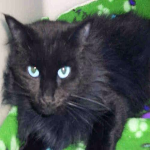

In [ ]:
PIL.Image.open(str("test_img.png"))